In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: MA
Digite os 2 primeiros digitos do shapefile: 21


# Importando o shapefile

In [3]:
gdf = gpd.read_file('Shapes/'+UF+'/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8875 entries, 0 to 8874
Data columns (total 14 columns):
ID            8875 non-null int64
CD_GEOCODI    8875 non-null object
TIPO          8875 non-null object
CD_GEOCODB    193 non-null object
NM_BAIRRO     193 non-null object
CD_GEOCODS    8875 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    8875 non-null object
NM_DISTRIT    8875 non-null object
CD_GEOCODM    8875 non-null object
NM_MUNICIP    8875 non-null object
NM_MICRO      8875 non-null object
NM_MESO       8875 non-null object
geometry      8875 non-null object
dtypes: int64(1), object(13)
memory usage: 970.8+ KB


In [4]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [5]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [6]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(8802, 13)

In [7]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,210005505000001,306.0,1086.0,"3,55","3,27","1128,24","3049005,59","1241,87","3215577,82","575,2","1409670,74","970,44","1995876,12"
1,210005505000002,489.0,1828.0,"3,74","2,7","1105,1","5747888,54","1233,77","6259574,59","546,55","2272477,16","941,39","3543933,4"
2,210005505000003,286.0,1077.0,"3,77","3,04",798,"1242755,54",858,"1284874,15","430,46","704213,09","706,31","961146,32"
3,210005505000004,358.0,1309.0,"3,66","3,16","913,93","2380697,27","1016,11","2543542,79","482,66","1039288,39","827,96","1497651,07"
4,210005505000005,378.0,1454.0,"3,85","2,59","964,8","4874670,37","1101,8","5417542,34","497,5","2231405,91","832,44","3456583,75"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [8]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [9]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [10]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8802 entries, 0 to 8801
Data columns (total 26 columns):
ID            8802 non-null int64
CD_GEOCODI    8802 non-null int64
TIPO          8802 non-null object
CD_GEOCODB    188 non-null object
NM_BAIRRO     188 non-null object
CD_GEOCODS    8802 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    8802 non-null object
NM_DISTRIT    8802 non-null object
CD_GEOCODM    8802 non-null object
NM_MUNICIP    8802 non-null object
NM_MICRO      8802 non-null object
NM_MESO       8802 non-null object
geometry      8802 non-null object
V001          8801 non-null float64
V002          8801 non-null float64
V003          8801 non-null object
V004          8801 non-null object
V005          8801 non-null object
V006          8801 non-null object
V007          8781 non-null object
V008          8781 non-null object
V009          8802 non-null object
V010          8802 non-null object
V011          8787 non-null object
V012          8

In [11]:
del gdf
del dados

Text(0.5,1,'MA')

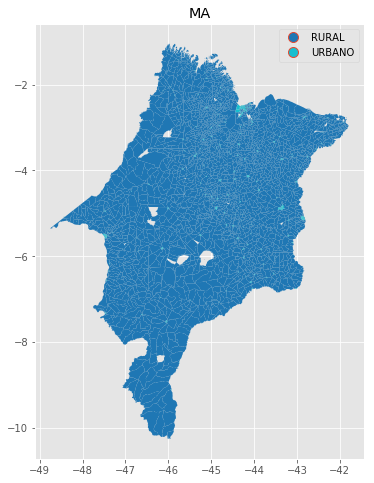

In [12]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [13]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [14]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [15]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [16]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [17]:
areas_urbanas_df_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
3079,SÃ£o JoÃ£o do Soter,MA,3.279,2111078.0,POLYGON ((-43.80661722305558 -5.12122525614334...,3.279455
3803,Bom Jardim,MA,4.469,2102002.0,POLYGON ((-45.59817024906134 -3.55051616168593...,4.469000
3826,Bom Jesus das Selvas,MA,4.577,2102036.0,POLYGON ((-46.86160713516428 -4.47761890215162...,4.576710
3974,Ãgua Doce do MaranhÃ£o,MA,1.767,2100154.0,POLYGON ((-42.10415405256628 -2.83736261442974...,1.766789
4056,EsperantinÃ³polis,MA,4.212,2104008.0,POLYGON ((-44.8865538800039 -4.862937957419526...,4.212187


In [18]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 217 entries, 3079 to 4445
Data columns (total 6 columns):
Municipio     217 non-null object
UF            217 non-null object
Area_Urb      217 non-null float64
CD_GEOCODM    217 non-null int64
geometry      217 non-null object
Area          217 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.9+ KB


In [19]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no MA')

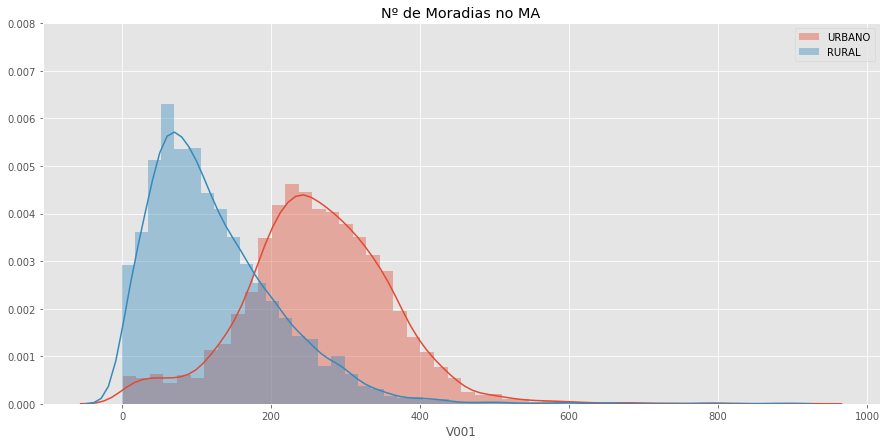

In [20]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [21]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    4694.000000
mean      123.504261
std        86.605586
min         0.000000
25%        60.000000
50%       105.000000
75%       170.000000
max       878.000000
Name: V001, dtype: float64
URBANO 
 count    4108.000000
mean      261.434275
std        99.986582
min         1.000000
25%       202.000000
50%       259.000000
75%       323.000000
max       909.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

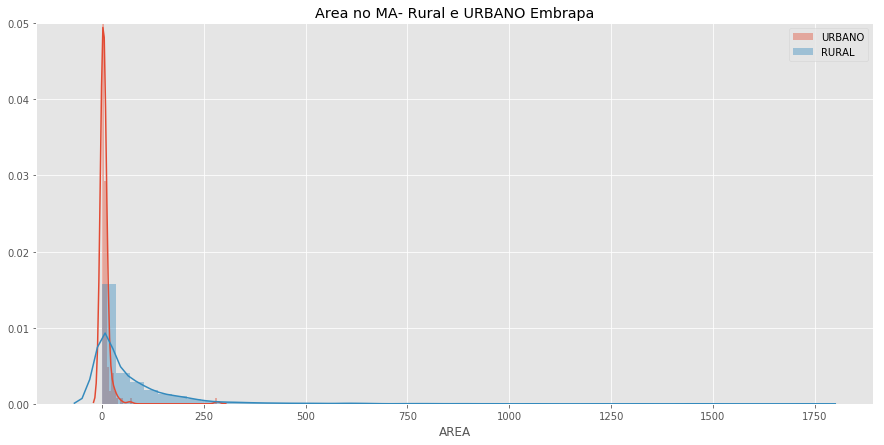

In [22]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_df_15['Area'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [23]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

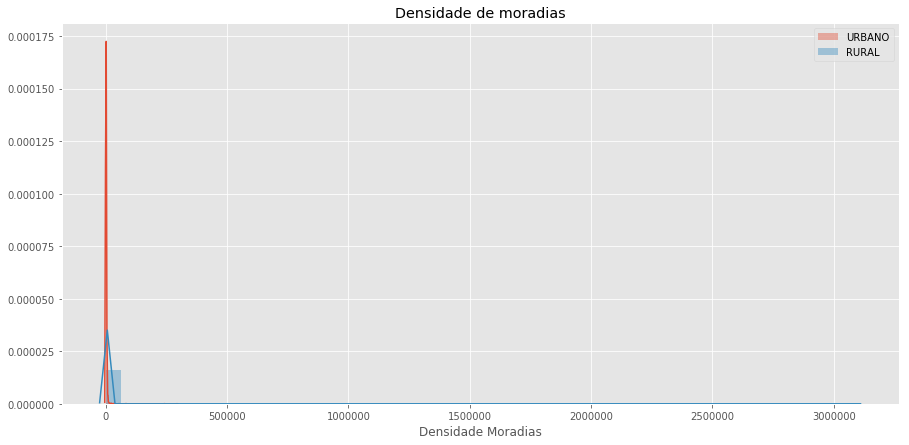

In [24]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [25]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    4.694000e+03
mean     8.467293e+02
std      4.503394e+04
min      0.000000e+00
25%      1.066078e+00
50%      4.112825e+00
75%      1.783147e+02
max      3.085144e+06
Name: Densidade Moradias, dtype: float64
URBANO 
 count      4108.000000
mean       1925.376343
std        6654.961743
min           0.291911
25%         435.807645
50%        1172.846052
75%        2333.133039
max      293191.771018
Name: Densidade Moradias, dtype: float64


In [26]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,904.000000,9.040000e+02,904.000000,904.000000,904.000000,9.040000e+02
mean,4236.033186,2.106733e+14,153.588496,622.295354,0.288184,4.239198e+03
std,2634.305356,4.250692e+11,101.479787,396.778168,0.224257,1.025951e+05
min,59.000000,2.100055e+14,3.000000,13.000000,0.000012,2.541130e+02
25%,1617.750000,2.102325e+14,74.750000,315.750000,0.121292,3.403879e+02
50%,4381.500000,2.106904e+14,134.000000,552.500000,0.238968,4.986304e+02
75%,6475.250000,2.111201e+14,211.000000,855.000000,0.391072,7.709559e+02
max,8873.000000,2.114007e+14,878.000000,3281.000000,2.244948,3.085144e+06


## Descrição da área por setor censitários urbanos e rurais

In [27]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    217.000000
mean       6.814320
std       20.387717
min        0.292997
25%        1.853397
50%        3.316908
75%        5.961195
max      283.347074
Name: Area, dtype: float64
RURAL 
 count    4694.000000
mean       69.428887
std       122.131045
min         0.000012
25%         0.560120
50%        25.883256
75%        92.264174
max      1732.644024
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

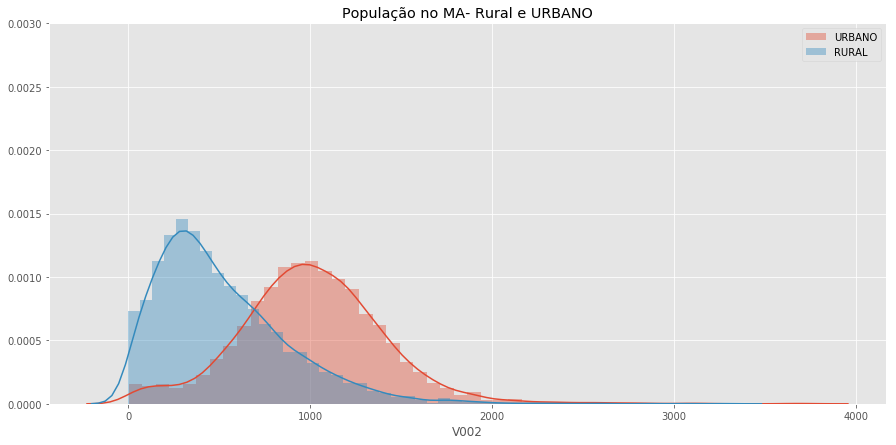

In [28]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [29]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    4694.000000
mean      515.936089
std       363.773077
min         0.000000
25%       252.000000
50%       437.000000
75%       707.000000
max      3281.000000
Name: V002, dtype: float64
URBANO 
 count    4108.000000
mean     1007.240993
std       402.079645
min         2.000000
25%       763.000000
50%       997.000000
75%      1243.250000
max      3729.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [30]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [31]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [32]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,38.000000,3.800000e+01,38.000000,38.000000,38.000000,38.000000
mean,5911.289474,2.109878e+14,351.684211,1337.815789,0.177944,2387.641988
std,2136.746288,3.569457e+11,117.620348,427.364447,0.101715,1195.028778
min,71.000000,2.100055e+14,268.000000,1017.000000,0.061162,1218.002659
25%,6464.250000,2.111201e+14,283.000000,1068.750000,0.109404,1477.547903
50%,6481.500000,2.111201e+14,302.500000,1151.500000,0.159853,2002.112811
75%,6572.250000,2.111201e+14,394.000000,1580.000000,0.220379,3098.678208
max,7630.000000,2.111300e+14,878.000000,3281.000000,0.604887,6213.708046


Text(0.5,1,'SCRCU - Por Município')

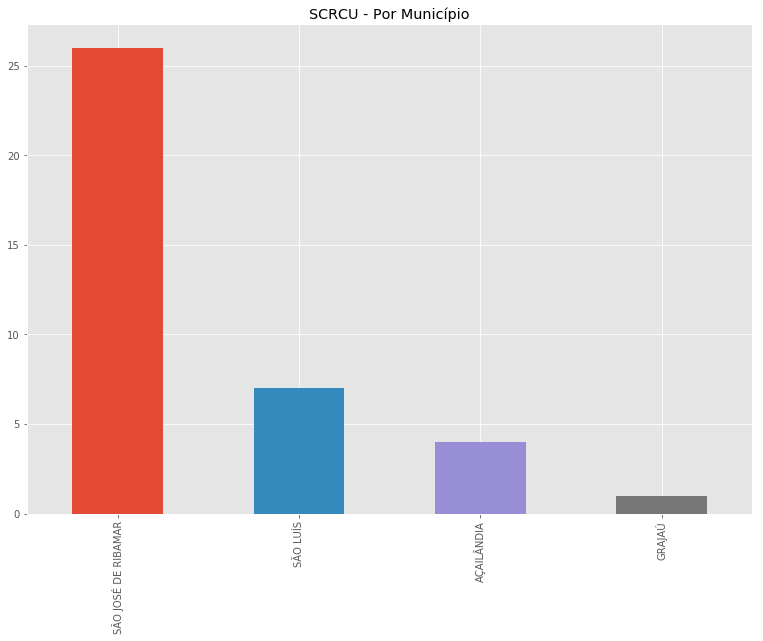

In [33]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


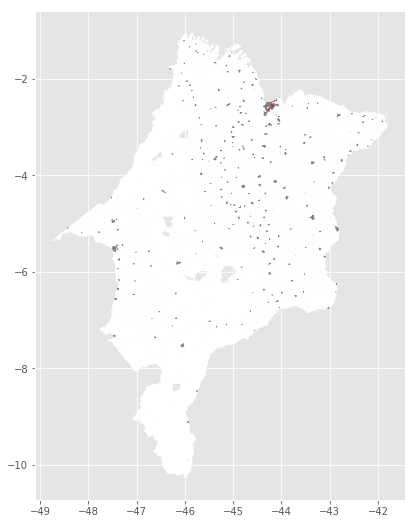

In [34]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [35]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [36]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [37]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [39]:
regioes_urbanas_df.head()

,geometry,FONTE
70,"POLYGON ((-46.9860443494916 -4.68742021613915,...",1.0
89,POLYGON ((-47.4227728122456 -4.910872859343379...,1.0
92,POLYGON ((-47.40439784672029 -4.89926743561523...,1.0
121,POLYGON ((-47.42619454417059 -4.90780324917374...,1.0
3080,"POLYGON ((-45.76761128594139 -5.6219006843541,...",1.0


In [40]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [41]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [42]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)